# Project: Investigate TMDB 5000 Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this report, we're analyzing a dataset for 10,000+ movies collected from The Movie Database (TMDb).
<br>
By the end of the analysis, we'll be able to answer some questions like:
<br>
<br>
**Q1. Is there a relation between budget and profit? (Does a production company has to spend big to achieve high profit?)
<br>
<br>
Q2. What are movie genres that return high profits?
<br>
<br>Q3. Who are the actors likely to make a successful movie (Hight Profits)?**


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling
After taking a look at our dataset and the questions we have to answer, let's clean out our dataset by keeping only relevant data and removing any unused parts.


### General Properties

In [30]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


It seems we have many columns unneeded for our analysis.

### Data Cleaning
To prepare our dataset for analysis we need to do some cleaning like:
<br>-Removing unnecessary columns
<br>-Remove duplicated rows
<br>-Remove movies that have unrecorded budget and revenues (zero values).
<br>-Change budget and revenues data types.

In [31]:
df.drop(['id','imdb_id','homepage','tagline','keywords','overview','release_date','production_companies','budget','director','vote_count','vote_average','revenue','runtime'],axis=1,inplace=True)

Dropped unneccessary columns for analysis.

In [32]:
df.head()

,popularity,original_title,cast,genres,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09


In [33]:
df.duplicated().sum()

1

Checked if there are duplicated rows.

In [34]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Dropped one duplicated row.

In [35]:
df.describe()

,popularity,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,12.813260,3.430753e+07,1.446383e+08
min,0.000065,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,2015.000000,4.250000e+08,2.827124e+09


In [36]:
print(df.budget_adj.value_counts()[0])
print(df.revenue_adj.value_counts()[0])

5696
6016


Both budget and revenue columns have rows with zero value (non recorded values).

In [37]:
df.budget_adj.replace(0,np.NAN,inplace=True)
df.revenue_adj.replace(0,np.NAN,inplace=True)
df.isnull().sum()

popularity           0
original_title       0
cast                76
genres              23
release_year         0
budget_adj        5696
revenue_adj       6016
dtype: int64

Replace zeros with no value.

In [38]:
df.dropna(inplace=True)
df.shape

(3850, 7)

After dropping missing value we have 3850 movie to analyze

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      3850 non-null   float64
 1   original_title  3850 non-null   object 
 2   cast            3850 non-null   object 
 3   genres          3850 non-null   object 
 4   release_year    3850 non-null   int64  
 5   budget_adj      3850 non-null   float64
 6   revenue_adj     3850 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 240.6+ KB


In [40]:
df.describe()

,popularity,release_year,budget_adj,revenue_adj
count,3850.000000,3850.000000,3.850000e+03,3.850000e+03
mean,1.192661,2001.260000,4.428320e+07,1.371986e+08
std,1.475527,11.284699,4.481243e+07,2.161832e+08
min,0.001117,1960.000000,9.693980e-01,2.370705e+00
25%,0.463201,1995.000000,1.314346e+07,1.841498e+07
50%,0.798343,2004.000000,3.004524e+07,6.179073e+07
75%,1.372826,2010.000000,6.072867e+07,1.633775e+08
max,32.985763,2015.000000,4.250000e+08,2.827124e+09


In [41]:
df.dtypes

popularity        float64
original_title     object
cast               object
genres             object
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

In [42]:
df = df.astype({'budget_adj' : np.int64 , 'revenue_adj' : np.int64})

In [43]:
df.dtypes

popularity        float64
original_title     object
cast               object
genres             object
release_year        int64
budget_adj          int64
revenue_adj         int64
dtype: object

Changed data type of budget and revenue columns from float to intger

In [44]:
df.describe()

,popularity,release_year,budget_adj,revenue_adj
count,3850.000000,3850.000000,3.850000e+03,3.850000e+03
mean,1.192661,2001.260000,4.428320e+07,1.371986e+08
std,1.475527,11.284699,4.481243e+07,2.161832e+08
min,0.001117,1960.000000,0.000000e+00,2.000000e+00
25%,0.463201,1995.000000,1.314346e+07,1.841498e+07
50%,0.798343,2004.000000,3.004524e+07,6.179073e+07
75%,1.372826,2010.000000,6.072867e+07,1.633775e+08
max,32.985763,2015.000000,4.250000e+08,2.827124e+09


In [45]:
df.head()

,popularity,original_title,cast,genres,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,2015,137999939,1392445892
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,2015,137999939,348161292
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,2015,101199955,271619025
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,2015,183999919,1902723129
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,2015,174799923,1385748801


<a id='eda'></a>
## Exploratory Data Analysis


### Question1. Does a production company has to spend big to achieve high profit? (What is relation between budget and profit?)

The unit of currency is not mentioned in the dataset so for the analysis, I will take it as dollars.

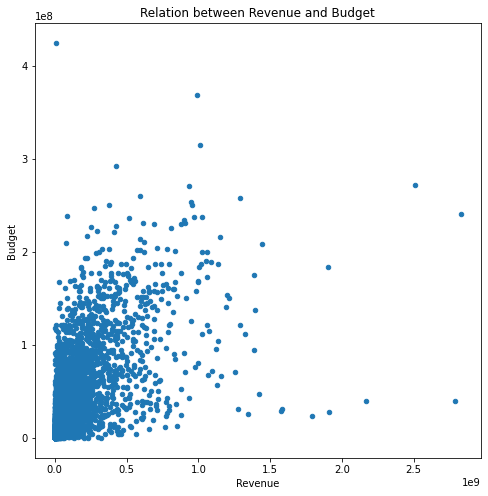

In [57]:
def relation():
    '''Displays relation between revenue and budget'''
    df.plot.scatter('revenue_adj','budget_adj',figsize=(8,8))
    plt.title('Relation between Revenue and Budget')
    plt.xlabel('Revenue')
    plt.ylabel('Budget');

relation()    

>From graph we can see there's a positive relation between budget and revenue

### Question 2. What movie genres return high profits?

First we have to create a column for profit

In [58]:
df['profit'] = df['revenue_adj'] - df['budget_adj']
df.head(2)

,popularity,original_title,cast,genres,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,2015,137999939,1392445892,1254445953
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,2015,137999939,348161292,210161353


In [59]:
df.profit.mean()

92915371.39714286

In [60]:
high_profit = df.query('profit >= 92915371')

Created a dataframe for movies with profit above average.

In [61]:
high_profit.shape

(1068, 8)

New dataframe contains 1068 most profitable movies.

In [62]:
#concetate all strings in genres column
genres = high_profit['genres'].str.cat(sep = '|')
#split and count genres 
genres = pd.Series(genres.split('|'))
genres.value_counts()

Action             392
Drama              380
Comedy             378
Adventure          332
Thriller           310
Family             187
Science Fiction    178
Romance            173
Crime              162
Fantasy            158
Animation          108
Mystery             89
Horror              82
Music               47
War                 41
History             30
Western             16
Documentary          2
dtype: int64

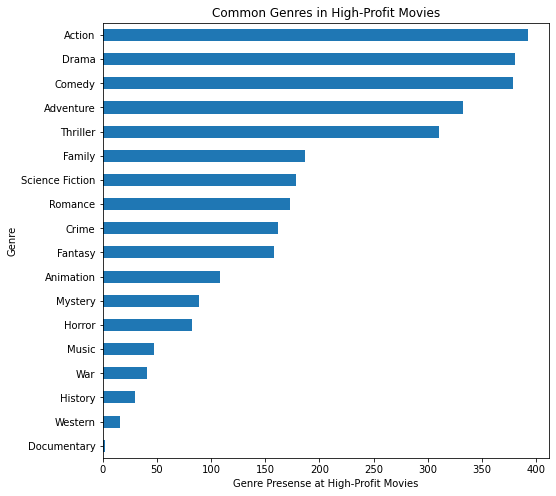

In [52]:
genres_count = genres.value_counts(ascending = True)
genres_count.plot(kind='barh',figsize=(8,8));
plt.title('Common Genres in High-Profit Movies')
plt.ylabel('Genre')
plt.xlabel('Genre Presense at High-Profit Movies');

>From calculations and graph we conclude that Action is the most common genre in highest profit movies followed by Drama then Comedy.

### Question 3. Who are the actors likely to make successful movie (Hight Profits) ?

Tom Cruise            27
Tom Hanks             21
Brad Pitt             20
Robert De Niro        19
Sylvester Stallone    18
dtype: int64


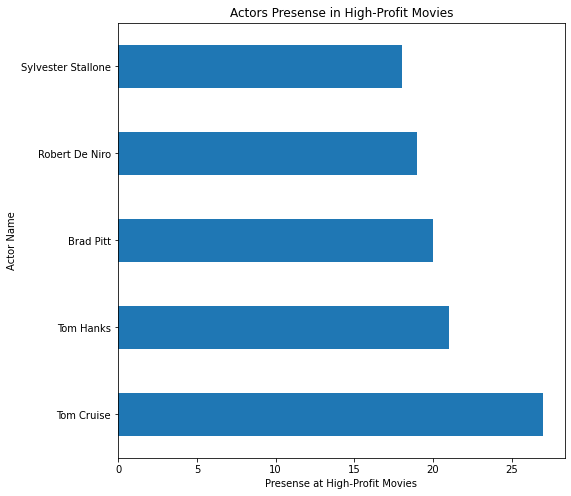

In [56]:
def cast_profit():
    '''Displays actors with most appearances at high profit movies'''
    cast = high_profit['cast'].str.cat(sep = '|')
    #split and count genres 
    cast = pd.Series(cast.split('|'))
    print(cast.value_counts()[:5])
    cast_count = cast.value_counts()[:5]
    cast_count.plot(kind='barh',figsize=(8,8));
    plt.title('Actors Presense in High-Profit Movies')
    plt.ylabel('Actor Name')
    plt.xlabel('Presense at High-Profit Movies');
    
cast_profit()      

>The actor whose movies appeared most at high-profit movies is Tome Cruise followed by Tom Hanks then Brad Pitt.

<a id='conclusions'></a>
## Conclusions
After finishing our analysis we can have some conclusions:
<br>
<br>
1.The more production company spend on movie/
budget it returnes higher revenues.
<br>
2.To make high profits stay within most successful genre which are Action, Drama and Comedy.
<br>
3.Tom Cruise has largest number of high-profit movies.

### Limitations
The only limitations faced are that there were so many null values and missing data that had to be neglected, and there was no unit of currency mentioned in the dataset.